In [1]:
import numpy as np  
import scipy.constants as const 
import matplotlib.pyplot as plt 
import uncertainties as unc 
%matplotlib inline

In [2]:
cal_channels = np.array([108, 216, 323.5, 431, 539, 646, 754, 861.5, 969])
cal_times = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 9
    # variables        = 2
    chi-square         = 2.5548e-05
    reduced chi-square = 3.6497e-06
    Akaike info crit   = -110.949622
    Bayesian info crit = -110.555173
    R-squared          = 0.99999957
[[Variables]]
    slope:      0.00929296 +/- 2.2920e-06 (0.02%) (init = 0.009292957)
    intercept: -0.00580597 +/- 0.00138916 (23.93%) (init = -0.005805969)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.8887


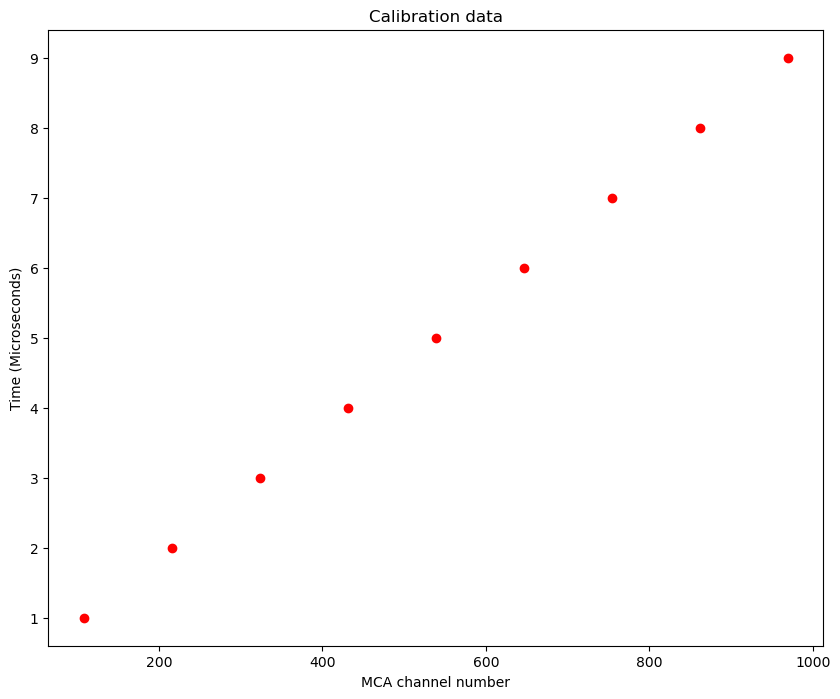

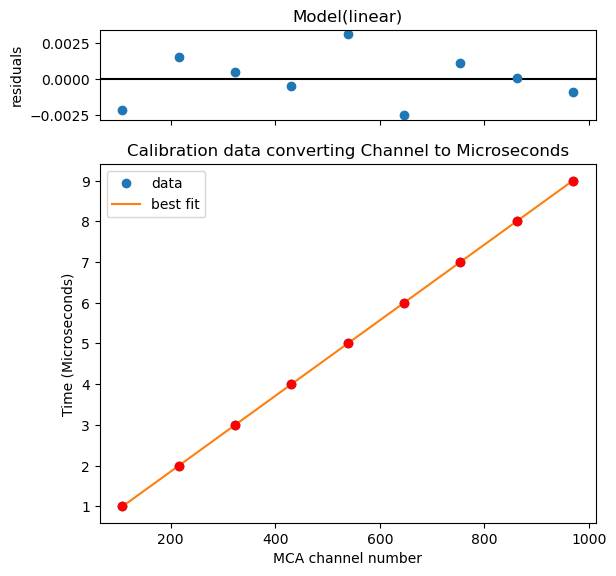

In [3]:
from lmfit.models import LinearModel

plt.figure(figsize=(10,8))
plt.xlabel('MCA channel number')
plt.ylabel('Time (Microseconds)')
plt.title('Calibration data')
plt.errorbar(cal_channels,cal_times,xerr=1/2,fmt='ro');


line = LinearModel()
param_guess = line.guess(cal_times, x=cal_channels)
line_fit = line.fit(cal_times, param_guess, x=cal_channels)
print(line_fit.fit_report())
line_fit.plot();

plt.xlabel('MCA channel number')
plt.ylabel('Time (Microseconds)')
plt.title('Calibration data converting Channel to Microseconds')
plt.errorbar(cal_channels,cal_times,xerr=1/2,fmt='ro');

In [4]:
calibration_slope = line_fit.params['slope'].value
calibration_intercept = line_fit.params['intercept'].value
print('calibration slope:', calibration_slope)
print('calibration intercept:', calibration_intercept)

calibration slope: 0.009292956625432607
calibration intercept: -0.0058059688996922425


In [5]:
import pandas as pd
data = pd.read_csv('final.txt', header = 0, names=['chan', 'counts'], sep='\t')

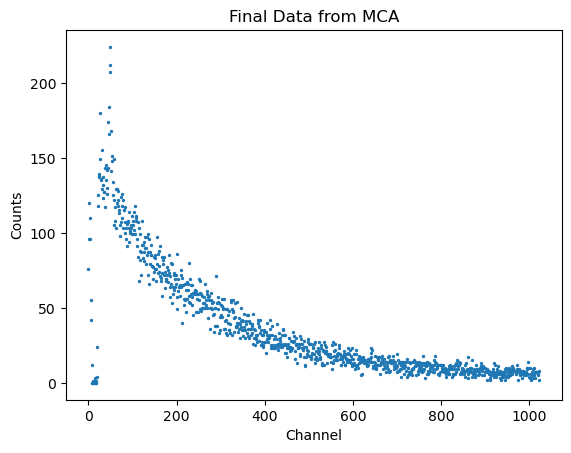

In [6]:
channels = np.array(data['chan'])
counts = np.array(data['counts'])
plt.scatter(channels, counts, s=2)
plt.title('Final Data from MCA')
plt.ylabel('Counts')
plt.xlabel('Channel')
plt.show()

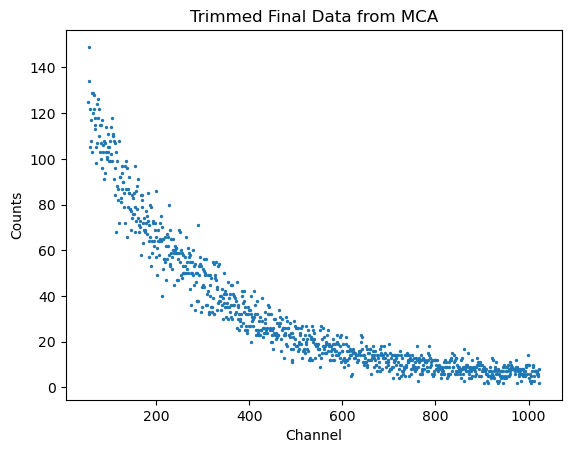

In [7]:
channels = channels[55:]
counts = counts[55:]
plt.scatter(channels, counts, s=2)
plt.title('Trimmed Final Data from MCA')
plt.ylabel('Counts')
plt.xlabel('Channel')
plt.show()

In [8]:
import lmfit
def exponential(x, A, tau, C):
    return A*np.exp(-x/tau)+C

model = lmfit.Model(exponential)
param_guess = model.make_params(A=1, tau=5, C=4)
line_fit = model.fit(counts, params = param_guess, x=channels)
print(line_fit.fit_report())

[[Model]]
    Model(exponential)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 95
    # data points      = 969
    # variables        = 3
    chi-square         = 30376.1013
    reduced chi-square = 31.4452395
    Akaike info crit   = 3344.34727
    Bayesian info crit = 3358.97607
    R-squared          = 0.96569983
[[Variables]]
    A:    148.477486 +/- 1.22116118 (0.82%) (init = 1)
    tau:  231.684987 +/- 3.60637811 (1.56%) (init = 5)
    C:    4.63743923 +/- 0.42769856 (9.22%) (init = 4)
[[Correlations]] (unreported correlations are < 0.100)
    C(tau, C) = -0.8180
    C(A, tau) = -0.6756
    C(A, C)   = +0.2638


In [9]:
print('\nA = ',line_fit.params['A'].value,'+/-',line_fit.params['A'].stderr)
print('\ntau = ',line_fit.params['tau'].value,'+/-',line_fit.params['tau'].stderr)
print('\nC = ',line_fit.params['C'].value,'+/-',line_fit.params['C'].stderr)
A_nw = line_fit.params['A'].value
tau_nw = line_fit.params['tau'].value  
C_nw = line_fit.params['C'].value


A =  148.47748592774786 +/- 1.2211611844432502

tau =  231.68498688845827 +/- 3.6063781095744596

C =  4.637439226657537 +/- 0.42769856161471986


Text(0.5, 0, 'Channel')

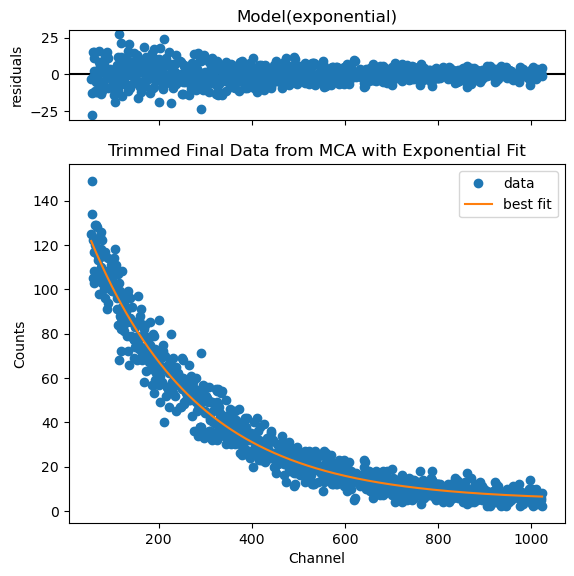

In [10]:
line_fit.plot()
plt.title('Trimmed Final Data from MCA with Exponential Fit')
plt.ylabel('Counts')
plt.xlabel('Channel')

In [11]:
import uncertainties as unc
from uncertainties import ufloat
def channel_to_time(channel):
    return channel*calibration_slope+calibration_intercept
tau = ufloat(231.68, 3.6)
decay_time_1 = channel_to_time(tau)
C = ufloat(4.64, 0.42)
background_1 = channel_to_time(C)

print('decay time:', decay_time_1, 'mu s')
print('background term:', background_1, 'mu s')

decay time: 2.147+/-0.033 mu s
background term: 0.037+/-0.004 mu s


In [12]:
weights = 1/np.sqrt(counts)

model = lmfit.Model(exponential)
param_guess = model.make_params(A=1, tau=5, C=4)
line_fit = model.fit(counts, params = param_guess, x=channels, weights = weights)
print(line_fit.fit_report())

[[Model]]
    Model(exponential)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 95
    # data points      = 969
    # variables        = 3
    chi-square         = 1033.30205
    reduced chi-square = 1.06967086
    Akaike info crit   = 68.2584596
    Bayesian info crit = 82.8872535
    R-squared          = 0.96444459
[[Variables]]
    A:    148.152798 +/- 1.91663373 (1.29%) (init = 1)
    tau:  233.660283 +/- 3.66452470 (1.57%) (init = 5)
    C:    3.35663380 +/- 0.27081891 (8.07%) (init = 4)
[[Correlations]] (unreported correlations are < 0.100)
    C(tau, C) = -0.8341
    C(A, tau) = -0.7872
    C(A, C)   = +0.4658


Text(0.5, 0, 'Channel')

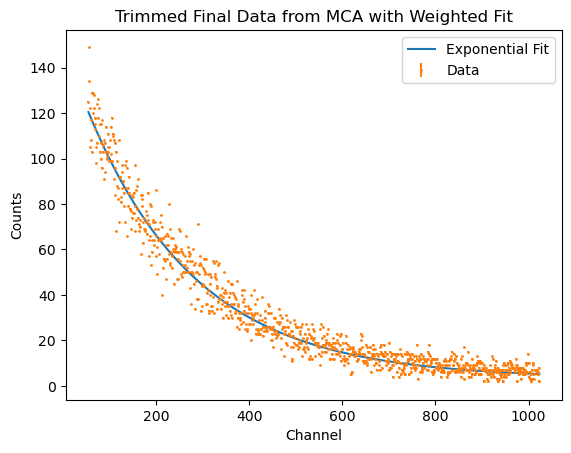

In [13]:
A_w = line_fit.params['A'].value
tau_w = line_fit.params['tau'].value  
C_w = line_fit.params['C'].value

plt.plot(channels, exponential(channels, A_w, tau_w, C_w), label='Exponential Fit')
plt.errorbar(channels, counts, yerr=weights, fmt='o', markersize=1, label='Data')
plt.legend()
plt.title('Trimmed Final Data from MCA with Weighted Fit')
plt.ylabel('Counts')
plt.xlabel('Channel')

In [14]:
A = ufloat(line_fit.params['A'].value,line_fit.params['A'].stderr)
tau = ufloat(line_fit.params['tau'].value,line_fit.params['tau'].stderr)
C = ufloat(line_fit.params['C'].value,line_fit.params['C'].stderr)

decay_time_2 = channel_to_time(tau)
background_2 = channel_to_time(C)

print('decay time:', decay_time_2, 'mu s')
print('background term:', background_2, 'mu s')

decay time: 2.166+/-0.034 mu s
background term: 0.0254+/-0.0025 mu s


In [16]:
c_singles = 39284005  
elapsed_time = 594807.9  
valid_starts = 7963894  
valid_conversions = 39614 
num_channels = 1024  

background_rate = c_singles/elapsed_time
background_counts = background_rate*(valid_starts)*10e-6
background_per_channel = background_counts/num_channels

print(f"Expected Background per Channel: {background_per_channel:.4f} counts per second")

background_term_3=channel_to_time(background_per_channel)

Expected Background per Channel: 5.1365 counts per second


In [17]:
params = line_fit.params
model = lmfit.Model(exponential)
param_guess = model.make_params(A=1, tau=5, C=4)
C = background_per_channel
param_guess['C'].value = C
param_guess['C'].vary = False 

line_fit = model.fit(counts, params = param_guess, x=channels)
print(line_fit.fit_report())

[[Model]]
    Model(exponential)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 71
    # data points      = 969
    # variables        = 2
    chi-square         = 30419.2690
    reduced chi-square = 31.4573619
    Akaike info crit   = 3343.72335
    Bayesian info crit = 3353.47588
    R-squared          = 0.96565109
[[Variables]]
    A:    148.863086 +/- 1.19455662 (0.80%) (init = 1)
    tau:  228.255150 +/- 2.05974013 (0.90%) (init = 5)
    C:    5.136467 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(A, tau) = -0.8298


In [18]:
A_ = ufloat(line_fit.params['A'].value,line_fit.params['A'].stderr)
tau_ = ufloat(line_fit.params['tau'].value,line_fit.params['tau'].stderr)
C_ = ufloat(line_fit.params['C'].value,line_fit.params['C'].stderr)
A_s = line_fit.params['A'].value
tau_s = line_fit.params['tau'].value  
C_s = line_fit.params['C'].value

Text(0.5, 0, 'Channel')

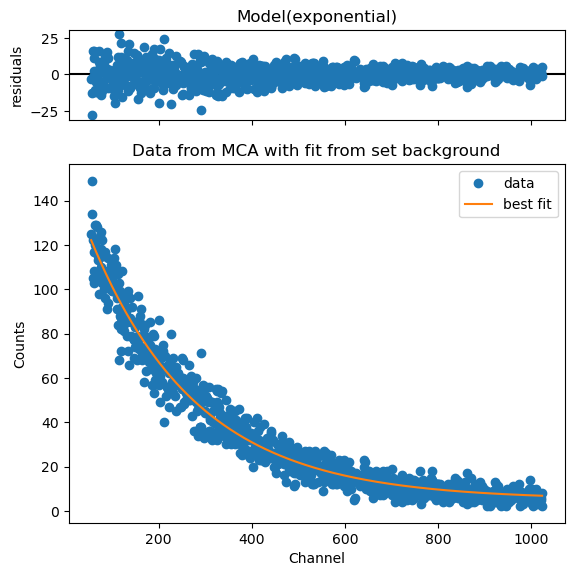

In [19]:
line_fit.plot()
plt.title('Data from MCA with fit from set background')
plt.ylabel('Counts')
plt.xlabel('Channel')

Text(0.5, 0, 'Channel')

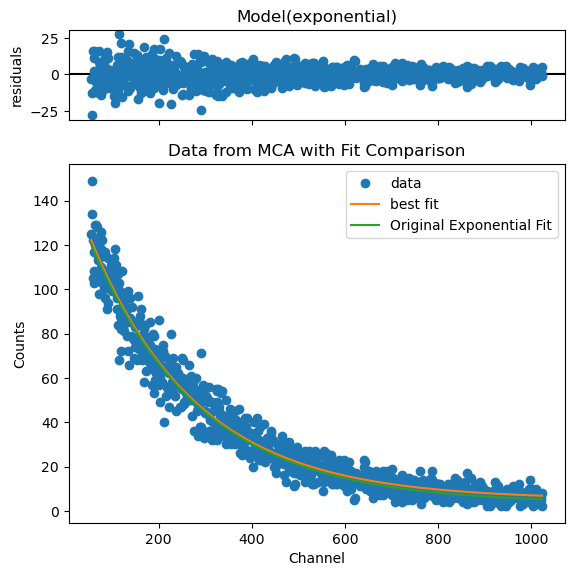

In [20]:
line_fit.plot()
plt.plot(channels, exponential(channels, A_w, tau_w, C_w), label='Original Exponential Fit')
plt.legend()
plt.title('Data from MCA with Fit Comparison')
plt.ylabel('Counts')
plt.xlabel('Channel')

In [21]:
decay_time_3 = channel_to_time(tau_)
print('decay time:', decay_time_3, 'mu s')

decay time: 2.115+/-0.019 mu s


In [22]:
def coarse_bin(x, y, binwidth=None):
    num_bins = len(x) // binwidth
    reshaped_x = x[:num_bins * binwidth].reshape(-1, binwidth)
    reshaped_y = y[:num_bins * binwidth].reshape(-1, binwidth)
    new_x = reshaped_x.mean(axis=1)
    new_y = reshaped_y.sum(axis=1)
    
    return (np.array(new_x),np.array(new_y))

In [23]:
newx, newy = coarse_bin(channels,counts,binwidth=16)

Text(0.5, 0, 'Channel')

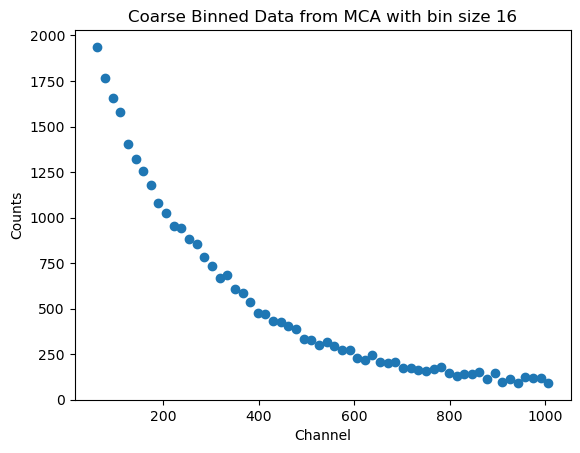

In [24]:
plt.scatter(newx, newy)
plt.title('Coarse Binned Data from MCA with bin size 16')
plt.ylabel('Counts')
plt.xlabel('Channel')

In [25]:
model = lmfit.Model(exponential)
param_guess = model.make_params(A=1, tau=5, C=4)
line_fit = model.fit(newy, params = param_guess, x=newx)
print(line_fit.fit_report())

[[Model]]
    Model(exponential)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 112
    # data points      = 60
    # variables        = 3
    chi-square         = 23708.0790
    reduced chi-square = 415.931211
    Akaike info crit   = 364.753596
    Bayesian info crit = 371.036629
    R-squared          = 0.99825587
[[Variables]]
    A:    2375.11952 +/- 17.8016400 (0.75%) (init = 1)
    tau:  231.782538 +/- 3.31378708 (1.43%) (init = 5)
    C:    74.2184530 +/- 6.32880291 (8.53%) (init = 4)
[[Correlations]] (unreported correlations are < 0.100)
    C(tau, C) = -0.8214
    C(A, tau) = -0.6741
    C(A, C)   = +0.2655


In [26]:
A = ufloat(line_fit.params['A'].value,line_fit.params['A'].stderr)
tau = ufloat(line_fit.params['tau'].value,line_fit.params['tau'].stderr)
C = ufloat(line_fit.params['C'].value,line_fit.params['C'].stderr)
A_c = line_fit.params['A'].value
tau_c = line_fit.params['tau'].value  
C_c = line_fit.params['C'].value

### Plot the rebinned data and the fit

If you have not done so already, plot the rebinned data and its fit curve.

Text(0.5, 0, 'Channel')

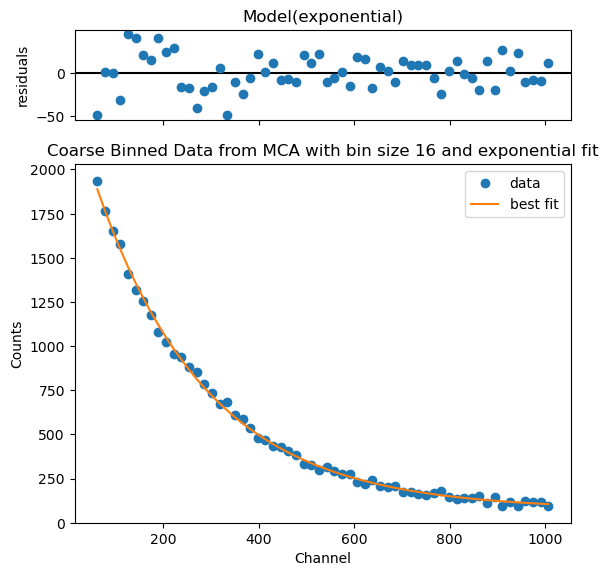

In [27]:
line_fit.plot()
plt.title('Coarse Binned Data from MCA with bin size 16 and exponential fit')
plt.ylabel('Counts')
plt.xlabel('Channel')

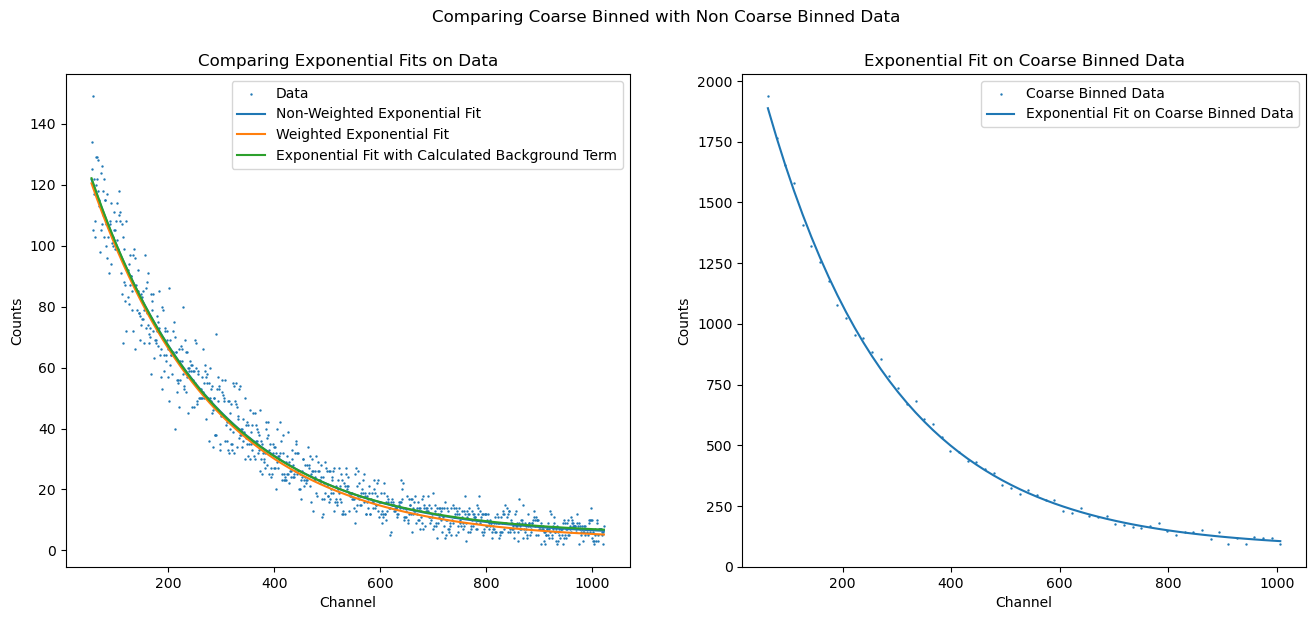

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6.4))
fig.suptitle('Comparing Coarse Binned with Non Coarse Binned Data')

ax1.scatter(channels, counts, s=0.5, label='Data')
ax1.plot(channels, exponential(channels, A_nw, tau_nw, C_nw), label='Non-Weighted Exponential Fit')
ax1.plot(channels, exponential(channels, A_w, tau_w, C_w), label='Weighted Exponential Fit')
ax1.plot(channels, exponential(channels, A_s, tau_s, C_s), label='Exponential Fit with Calculated Background Term')
ax1.set_title('Comparing Exponential Fits on Data')
ax1.set_ylabel('Counts')
ax1.set_xlabel('Channel')
ax1.legend()

ax2.scatter(newx, newy, s=0.5, label='Coarse Binned Data')
ax2.plot(newx, exponential(newx, A_c, tau_c, C_c), label='Exponential Fit on Coarse Binned Data')
ax2.set_title('Exponential Fit on Coarse Binned Data')
ax2.set_ylabel('Counts')
ax2.set_xlabel('Channel')
ax2.legend()

plt.show()

In [29]:
decay_time_4 = channel_to_time(tau)
background_4 = channel_to_time(C)

print('decay time:', decay_time_4, 'mu s')
print('background term:', background_4, 'mu s')

decay time: 2.148+/-0.031 mu s
background term: 0.68+/-0.06 mu s


In [30]:
print('            Method        | Muon Lifetime(mu s) | Background Delay (mu s)')
print('--------------------------|-------------------|----------------------')
print(' Non-weighted Exponential | ', decay_time_1,'   |  ', background_1)
print('  Weighted Exponential    | ', decay_time_2,'   |  ', background_2)
print('     Set Background       | ', decay_time_3,'   |  ', float(f"{background_term_3:.3g}"))
print('   Coarse-Binned Data     | ', decay_time_4,'   |  ', background_4)

            Method        | Muon Lifetime(mu s) | Background Delay (mu s)
--------------------------|-------------------|----------------------
 Non-weighted Exponential |  2.147+/-0.033    |   0.037+/-0.004
  Weighted Exponential    |  2.166+/-0.034    |   0.0254+/-0.0025
     Set Background       |  2.115+/-0.019    |   0.0419
   Coarse-Binned Data     |  2.148+/-0.031    |   0.68+/-0.06
